In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Đọc file data.csv
path_to_file = 'data.csv'
customer_data = pd.read_csv(path_to_file)

customer_data.shape
customer_data.columns
print(customer_data.describe().transpose())
print(customer_data.head())

                        count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0  
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins=intervals)
print(customer_data['Age Groups'])

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]


In [3]:
print(customer_data.groupby('Age Groups')['Age Groups'].count())

Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_24308\3147721040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(customer_data.groupby('Age Groups')['Age Groups'].count())


In [4]:
customer_data_oh = pd.get_dummies(customer_data, dtype=int)
print(customer_data_oh)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Genre_Female  Genre_Male  Age Groups_(15, 20]  Age Groups_(20, 30]  \
0               0           1                    1                    0   
1               0           1    

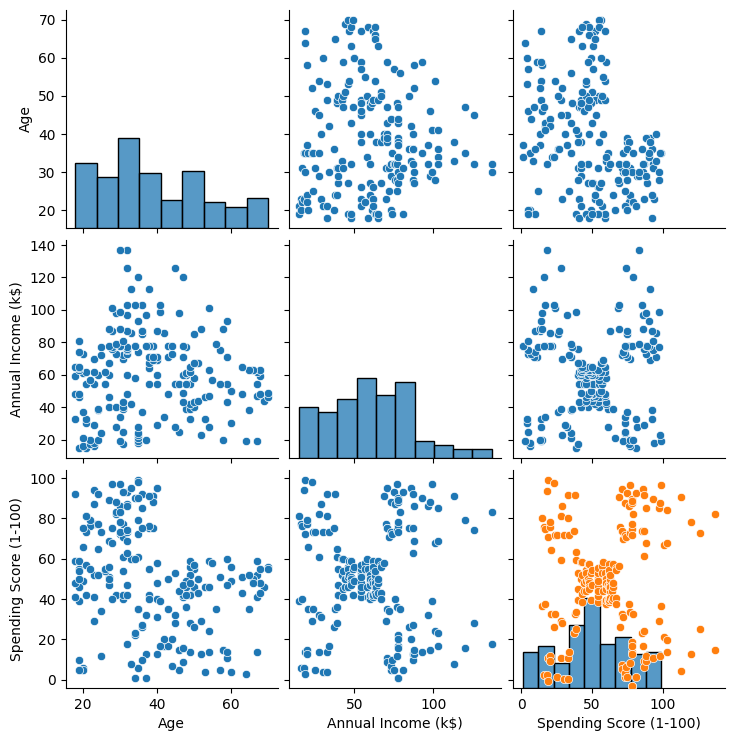

In [5]:
customer_data = customer_data.drop('CustomerID', axis=1)
sns.pairplot(customer_data)
sns.scatterplot(x=customer_data['Annual Income (k$)'],
                y=customer_data['Spending Score (1-100)'])
plt.show()

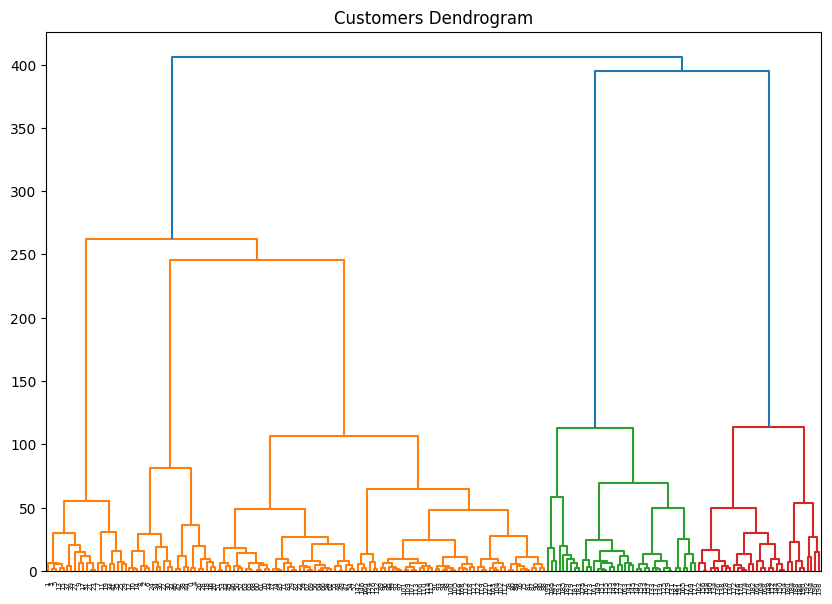

In [6]:
customer_data_oh = customer_data_oh.drop(['Age'], axis=1)
customer_data_oh.shape  # (200, 10)

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
                       method='ward',
                       metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

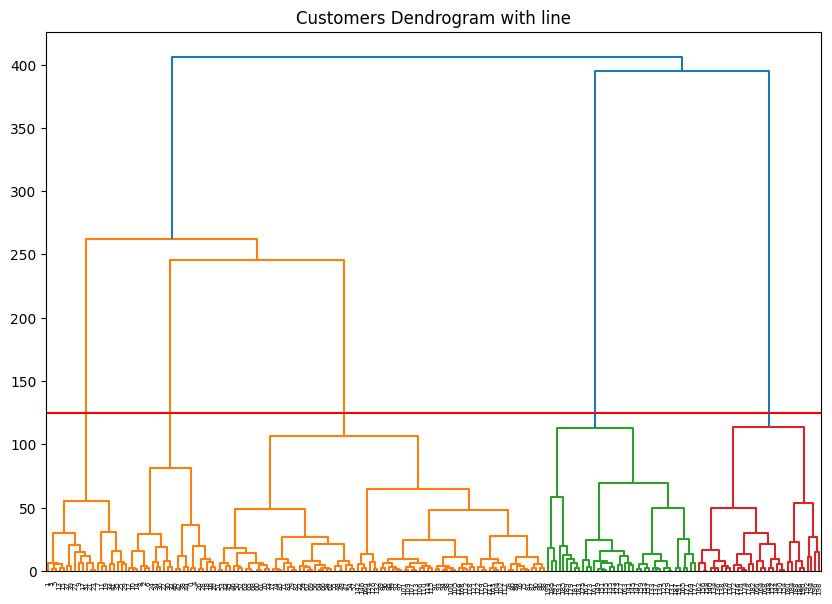

In [7]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data,
                       method='ward',
                       metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y=125, color='r', linestyle='-')
plt.show()

In [8]:
clustering_model = AgglomerativeClustering(n_clusters=5,
                                           linkage='ward')

clustering_model.fit(selected_data)
clustering_model.labels_

data_labels = clustering_model.labels_
print(data_labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


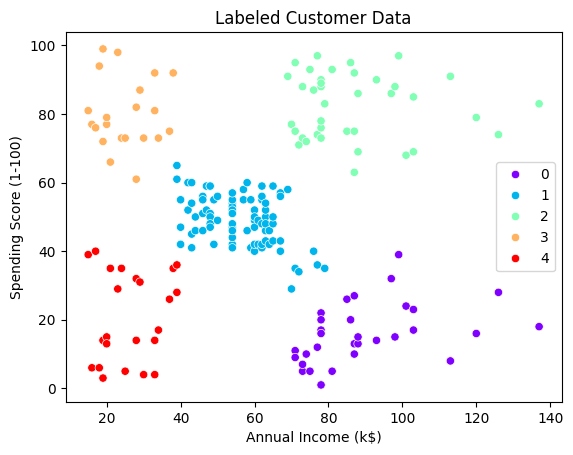

In [9]:
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')
plt.show()

## Single-linkage

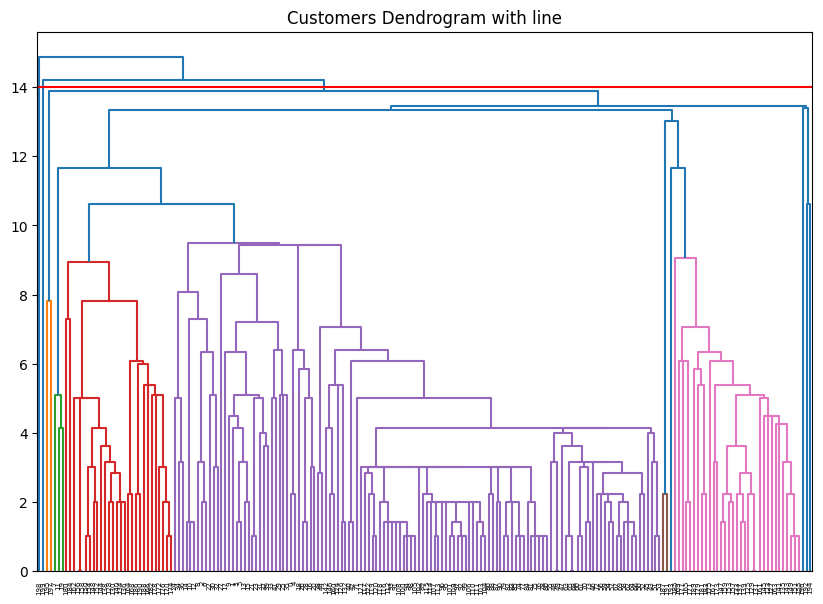

Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]


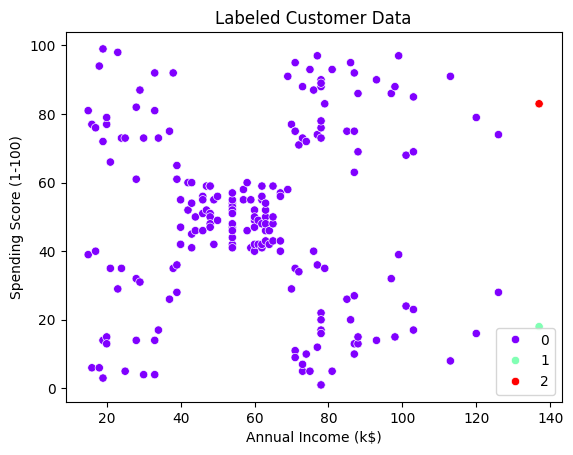

In [10]:
# Plot dendrogram with single linkage
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data,
                       method='single',
                       metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y=14, color='r', linestyle='-')
plt.show()

# Fit single linkage clustering model
clustering_model = AgglomerativeClustering(n_clusters=3,
                                           linkage='single')

clustering_model.fit(selected_data)
clustering_model.labels_

data_labels = clustering_model.labels_
print("Labels:", data_labels)

# Plot scatterplot with single linkage
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')
plt.show()

## Complete-linkage

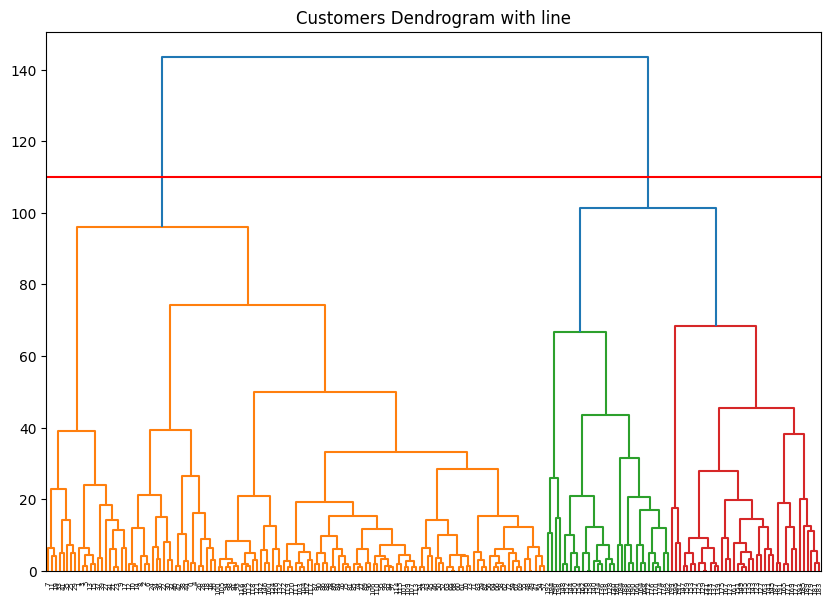

Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


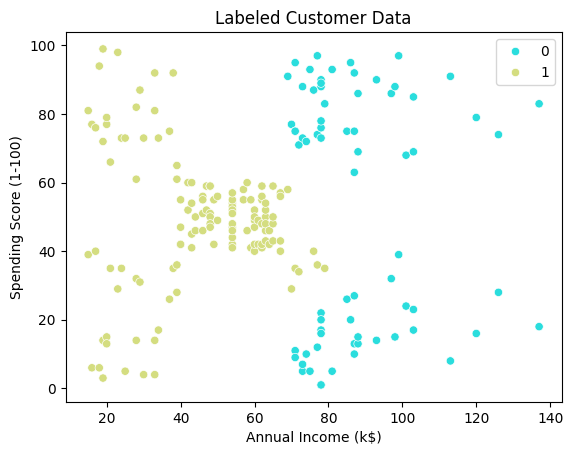

In [11]:
# Plot dendrogram with single linkage
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data,
                       method='complete',
                       metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y=110, color='r', linestyle='-')
plt.show()

# Fit single linkage clustering model
clustering_model = AgglomerativeClustering(n_clusters=2,
                                           linkage='complete')

clustering_model.fit(selected_data)
clustering_model.labels_

data_labels = clustering_model.labels_
print("Labels:", data_labels)

# Plot scatterplot with single linkage
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')
plt.show()

## Average-linkage

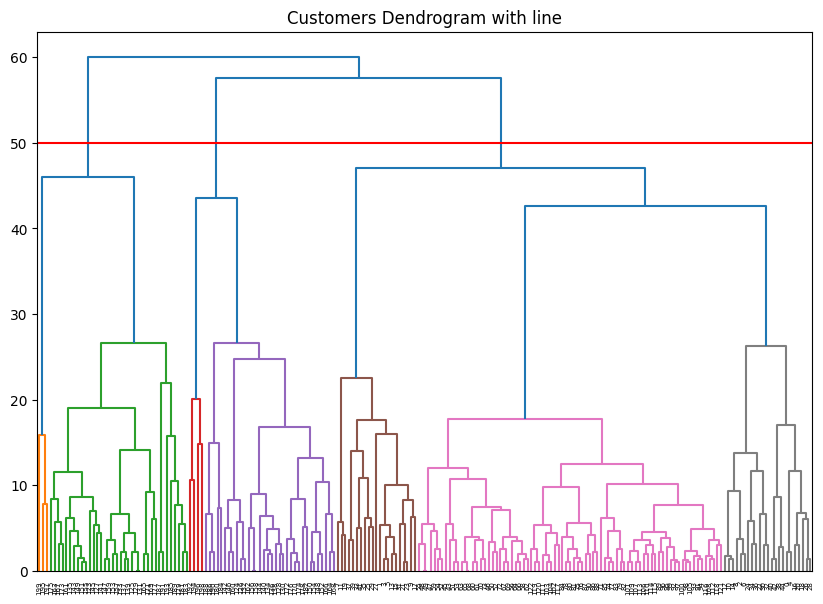

Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


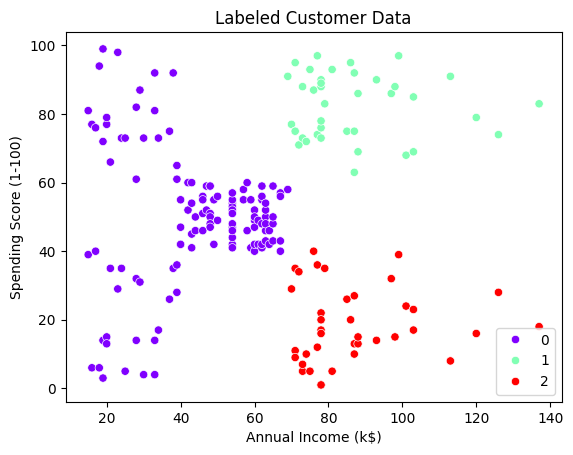

In [12]:
# Plot dendrogram with single linkage
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data,
                       method='average',
                       metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

# Fit single linkage clustering model
clustering_model = AgglomerativeClustering(n_clusters=3,
                                           linkage='average')

clustering_model.fit(selected_data)
clustering_model.labels_

data_labels = clustering_model.labels_
print("Labels:", data_labels)

# Plot scatterplot with single linkage
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')
plt.show()

# Thuật toán tự viết

## Single-linkage

In [13]:
# Tính khoảng cách chuẩn 2
def compute_distance(a, b):
    sum = 0
    for i in range(len(a)):
        sum += (a[i] - b[i]) ** 2
    return np.sqrt(sum)

In [14]:
# Tạo ma trận khoảng cách M
def create_distance_matrix(data):
    n = len(data)
    M = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            M[i][j] = compute_distance(data[i], data[j])
    return M

In [15]:
def Single_linkage_matrix(data):
    data = np.array(data)
    n = len(data)
    current_clusters = {i: [i] for i in range(n)}  # Mỗi điểm là 1 cụm ban đầu
    next_cluster_id = n
    Z = []

    while len(current_clusters) > 1:
        # Tìm hai cụm gần nhau nhất
        min_dist = np.inf
        to_merge = (-1, -1)

        cluster_list = list(current_clusters.keys())

        for i in range(len(cluster_list)):
            for j in range(i + 1, len(cluster_list)):
                c1 = cluster_list[i]
                c2 = cluster_list[j]

                # Khoảng cách giữa 2 cụm là khoảng cách nhỏ nhất giữa mọi cặp điểm
                min_link = np.inf
                for p1 in current_clusters[c1]:
                    for p2 in current_clusters[c2]:
                        d = compute_distance(data[p1], data[p2])
                        if d < min_link:
                            min_link = d

                if min_link < min_dist:
                    min_dist = min_link
                    to_merge = (c1, c2)

        i, j = to_merge

        # Gộp cụm i và j
        new_cluster = current_clusters[i] + current_clusters[j]
        Z.append([i, j, min_dist, len(new_cluster)])

        # Cập nhật cụm
        current_clusters[next_cluster_id] = new_cluster
        del current_clusters[i]
        del current_clusters[j]
        next_cluster_id += 1

    return np.array(Z)

## Complete-linkage

In [16]:
def Complete_linkage_matrix(data):
    data = np.array(data)
    n = len(data)
    current_clusters = {i: [i] for i in range(n)}  # Mỗi điểm là 1 cụm
    next_cluster_id = n
    Z = []

    while len(current_clusters) > 1:
        cluster_list = list(current_clusters.keys())
        min_max_dist = float('inf')
        to_merge = (-1, -1)

        # Duyệt qua tất cả cặp cụm để tìm cặp có khoảng cách lớn nhất nhỏ nhất
        for i in range(len(cluster_list)):
            for j in range(i + 1, len(cluster_list)):
                c1 = cluster_list[i]
                c2 = cluster_list[j]

                # Khoảng cách complete: khoảng cách xa nhất giữa các điểm 2 cụm
                max_dist = 0
                for p1 in current_clusters[c1]:
                    for p2 in current_clusters[c2]:
                        d = compute_distance(data[p1], data[p2])
                        if d > max_dist:
                            max_dist = d

                # Tìm cặp có max_dist nhỏ nhất
                if max_dist < min_max_dist:
                    min_max_dist = max_dist
                    to_merge = (c1, c2)

        i, j = to_merge

        # Gộp cụm i và j
        new_cluster = current_clusters[i] + current_clusters[j]
        Z.append([i, j, min_max_dist, len(new_cluster)])

        # Cập nhật cụm
        current_clusters[next_cluster_id] = new_cluster
        del current_clusters[i]
        del current_clusters[j]
        next_cluster_id += 1

    return np.array(Z)

## Average-linkage

In [17]:
def Average_linkage_matrix(data):
    data = np.array(data)
    n = len(data)
    current_clusters = {i: [i] for i in range(n)}  # Mỗi điểm là 1 cụm ban đầu
    next_cluster_id = n
    Z = []

    while len(current_clusters) > 1:
        cluster_list = list(current_clusters.keys())
        min_avg_dist = float('inf')
        to_merge = (-1, -1)

        # Tìm hai cụm có khoảng cách trung bình nhỏ nhất
        for i in range(len(cluster_list)):
            for j in range(i + 1, len(cluster_list)):
                c1 = cluster_list[i]
                c2 = cluster_list[j]

                total_dist = 0
                count = 0
                for p1 in current_clusters[c1]:
                    for p2 in current_clusters[c2]:
                        d = compute_distance(data[p1], data[p2])
                        total_dist += d
                        count += 1

                avg_dist = total_dist / count

                if avg_dist < min_avg_dist:
                    min_avg_dist = avg_dist
                    to_merge = (c1, c2)

        i, j = to_merge

        # Gộp cụm i và j
        new_cluster = current_clusters[i] + current_clusters[j]
        Z.append([i, j, min_avg_dist, len(new_cluster)])

        # Cập nhật cụm
        current_clusters[next_cluster_id] = new_cluster
        del current_clusters[i]
        del current_clusters[j]
        next_cluster_id += 1

    return np.array(Z)

# So sánh với hàm trong thư viện

## Single-linkage

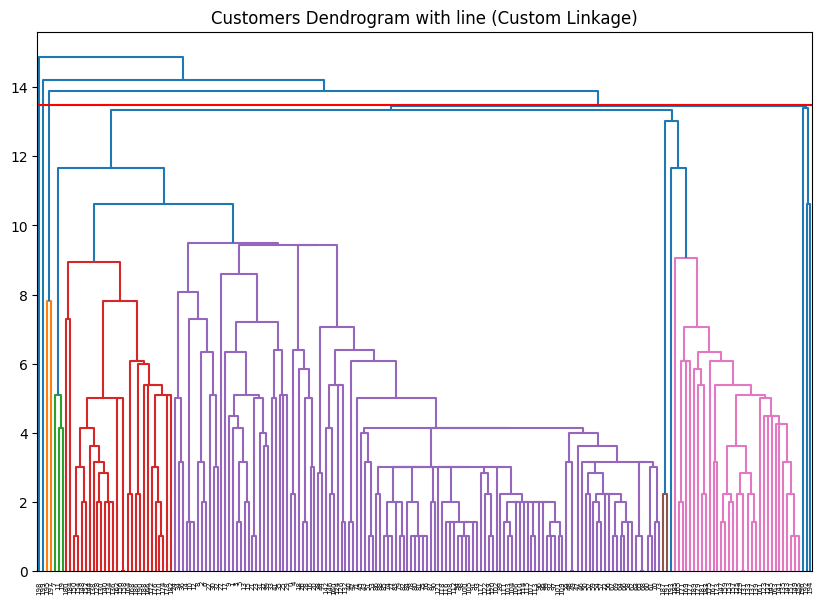

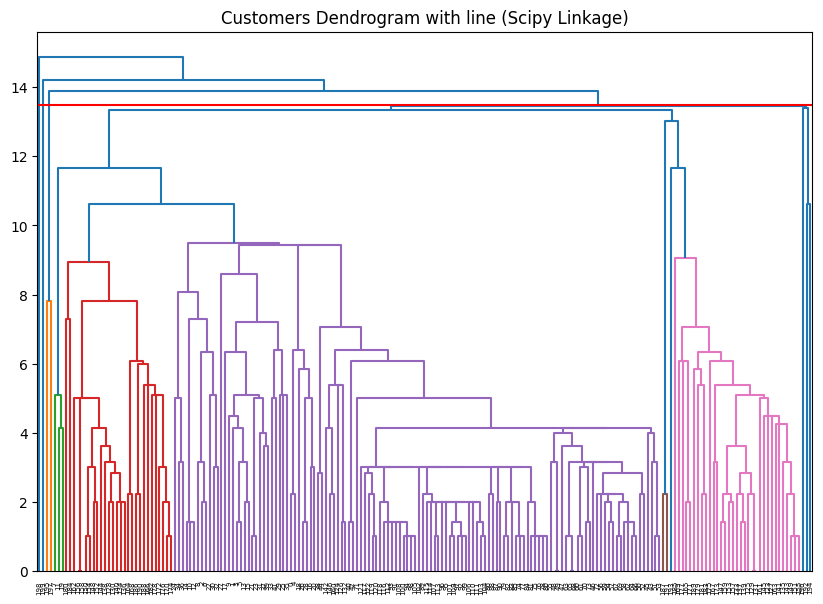

In [18]:
single_linkage_matrix = Single_linkage_matrix(selected_data)
single_linkage_matrix_lib = shc.linkage(selected_data, method='single', metric='euclidean')
# Plot dendrograms
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line (Custom Linkage)")
shc.dendrogram(single_linkage_matrix)
plt.axhline(y=13.5, color='r', linestyle='-')
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line (Scipy Linkage)")
shc.dendrogram(single_linkage_matrix_lib)
plt.axhline(y=13.5, color='r', linestyle='-')
plt.show()

## Complete-linkage

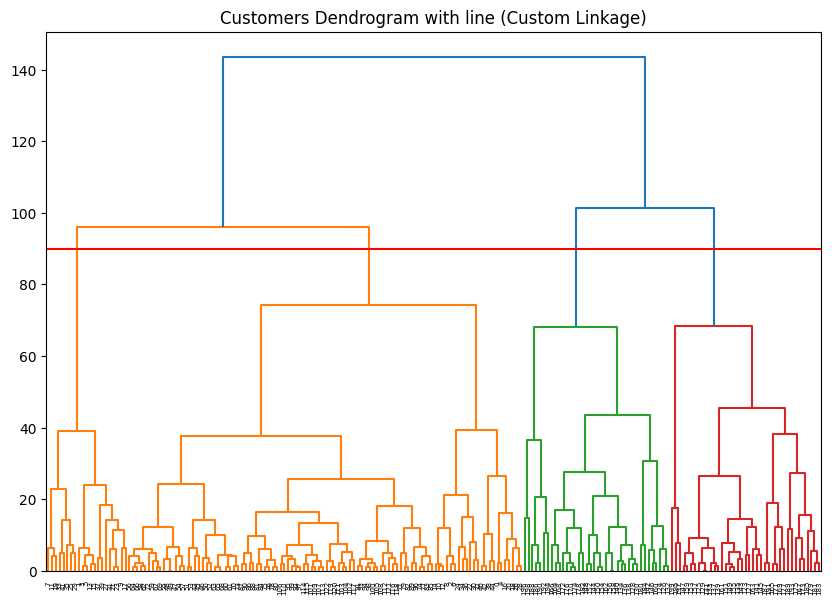

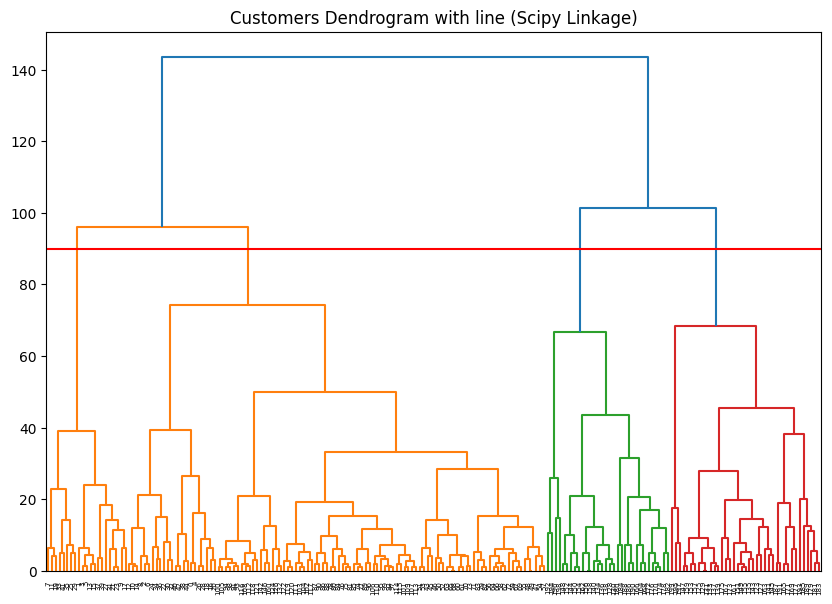

In [19]:
complete_linkage_matrix = Complete_linkage_matrix(selected_data)
complete_linkage_matrix_lib = shc.linkage(selected_data, method='complete', metric='euclidean')
# Plot dendrograms
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line (Custom Linkage)")
shc.dendrogram(complete_linkage_matrix)
plt.axhline(y=90, color='r', linestyle='-')
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line (Scipy Linkage)")
shc.dendrogram(complete_linkage_matrix_lib)
plt.axhline(y=90, color='r', linestyle='-')
plt.show()

## Average-linkage

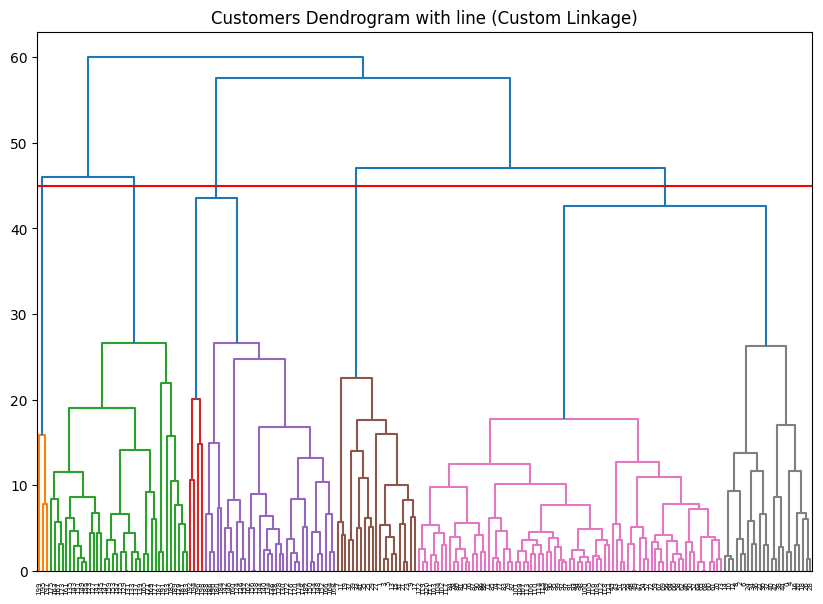

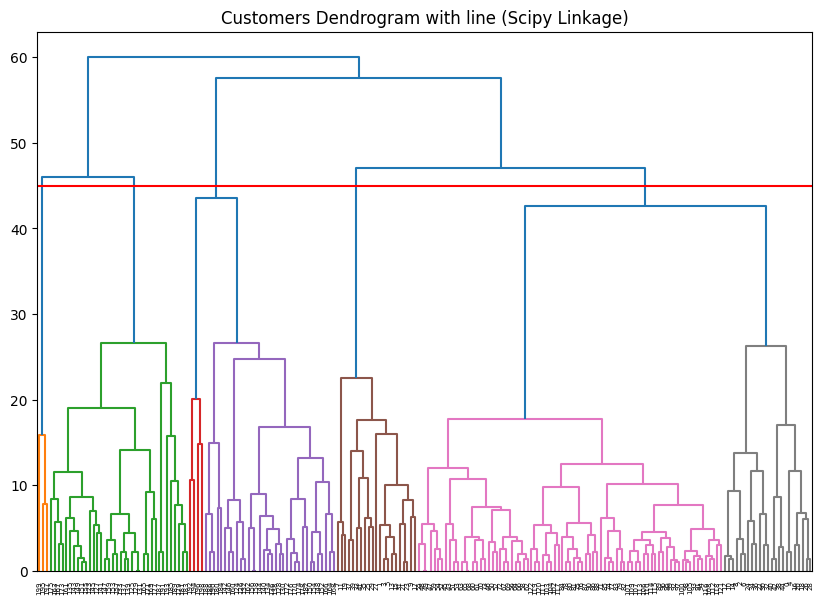

In [20]:
average_linkage_matrix = Average_linkage_matrix(selected_data)
average_linkage_matrix_lib = shc.linkage(selected_data, method='average', metric='euclidean')
# Plot dendrograms
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line (Custom Linkage)")
shc.dendrogram(average_linkage_matrix)
plt.axhline(y=45, color='r', linestyle='-')
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line (Scipy Linkage)")
shc.dendrogram(average_linkage_matrix_lib)
plt.axhline(y=45, color='r', linestyle='-')
plt.show()